 #  A Whale off the Port(folio) - PANI MADDI 

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

## QUANTITATIVE ANALYSIS SUMMARY - PANI MADDI

**PERFORMANCE ANALYSIS**

1. **ALGO1** had the highest cumulative return over the entire period
2. Both **ALGO1** and **Berkshire Hathaway** had higher cumulative returns than S&P 500
3. **Berkshire Hathaway** and **Tiger Global Management** have higher annualized standard deviation than S&P 500. Hence riskier
4. Looking the rolling standard deviation plot it is evident risk for all the portfolios increase when risk increased fo S&P 500
5. **Algo 2** (corr coeff @ 0.86) and **Soros Fund** (corr coeff @ 0.83) are highly correlated with S&P 500
6. **ALGO1** @ 1.38 has the highest Sharpe Ratio outperforming S&P500 and all the other whales portfolios

**MY CUSTOM PORTFOLIO**
1. I choose 3 stocks - **TSLA**, **TDOC**, **AMT** with equal weights
2. My custom portfolio had a sharpe ratio of **0.75** beating all other portfolios and 2nd only to **ALGO1**

### Import all the needed dependencies

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns

whale_returns_data = Path("Resources/whale_returns.csv")

# Define dataframe and display few values

whale_returns_df = pd.read_csv(whale_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index(inplace = True)
whale_returns_df.columns = ["SOROS", "PAULSON", "TIGER", "BERKSHIRE"]
whale_returns_df.head()


,SOROS,PAULSON,TIGER,BERKSHIRE
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Display if there any Null values
# Any Null values will show as True

whale_returns_df.isna()


,SOROS,PAULSON,TIGER,BERKSHIRE
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [5]:
# Count null values

whale_returns_df.isna().sum()

SOROS        1
PAULSON      1
TIGER        1
BERKSHIRE    1
dtype: int64

In [6]:
# Drop null values

whale_returns_df.dropna(inplace=True)

In [7]:
# Test if ther any Null values. Any Null values will show as True

whale_returns_df.isna()

,SOROS,PAULSON,TIGER,BERKSHIRE
Date,,,,
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
2015-03-09,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns

algo_returns_data = Path("Resources/algo_returns.csv")

# Define dataframe and display few values

algo_returns_df = pd.read_csv(algo_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_index(inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Display if there any Null values
# Any Null values will show as True

algo_returns_df.isna()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [10]:
# Count null values

algo_returns_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop null values

algo_returns_df.dropna(inplace=True)

In [12]:
# Test if ther any Null values. Any Null values will show as True

algo_returns_df.isna()

,Algo 1,Algo 2
Date,,
2014-06-05,False,False
2014-06-06,False,False
2014-06-09,False,False
2014-06-10,False,False
2014-06-11,False,False
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history = Path("Resources/sp500_history.csv")

# Define dataframe and display few values

sp500_history_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index(inplace = True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [14]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [15]:
# Remove "$" from Close

sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [16]:
# Fix Data Types

sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [17]:
# Calculate Daily Returns

sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [18]:
# Display if there any Null values
# Any Null values will show as True

sp500_returns_df.isna()


,Close
Date,
2012-10-01,True
2012-10-02,False
2012-10-03,False
2012-10-04,False
2012-10-05,False
...,...
2019-04-16,False
2019-04-17,False
2019-04-18,False


In [19]:
# Drop null values
sp500_returns_df.dropna(inplace=True)

In [20]:
# Test if ther any Null values. Any Null values will show as True

sp500_returns_df.isna()

,Close
Date,
2012-10-02,False
2012-10-03,False
2012-10-04,False
2012-10-05,False
2012-10-08,False
...,...
2019-04-16,False
2019-04-17,False
2019-04-18,False


In [21]:
# Rename Column - Rename 'Close' with 'S&P 500'

sp500_returns_df.columns = ["S&P 500"]

sp500_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [22]:
# Concatenate all DataFrames into a single DataFrame

combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis="columns", join="inner")
combined_df.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [23]:
combined_df

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

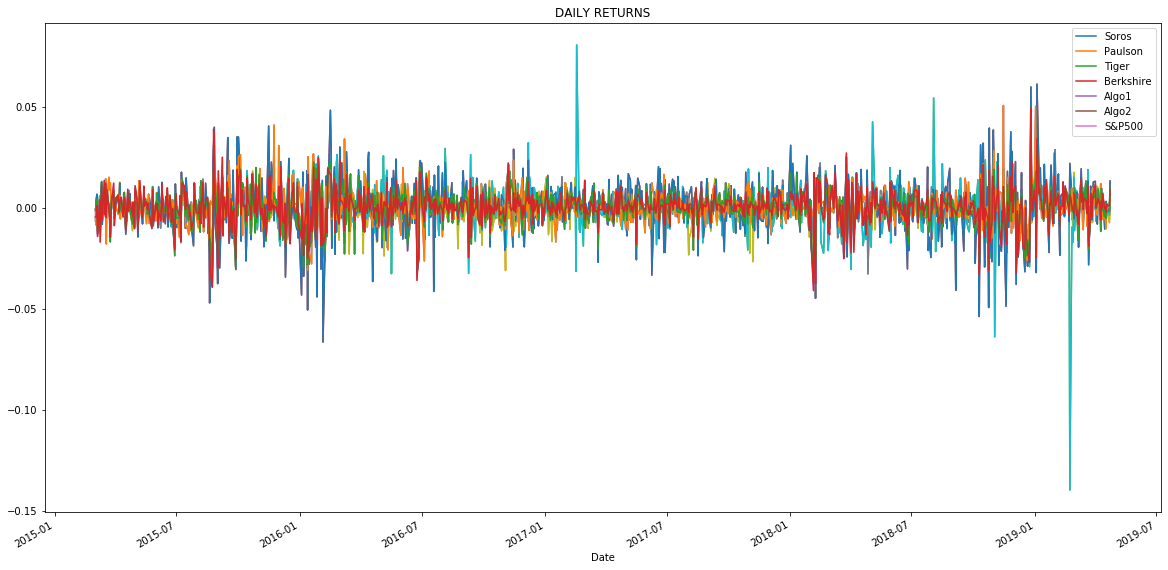

In [24]:
# Plot daily returns

ax = combined_df.plot()
combined_df.plot(figsize=(20, 10), title = 'DAILY RETURNS', ax = ax)

# Set the legend of the figure

ax.legend(["Soros","Paulson","Tiger", "Berkshire", "Algo1", "Algo2", "S&P500"],loc=0);

In [25]:
# Calculate cumulative returns

cum_returns = (1 + combined_df).cumprod()
cum_returns.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


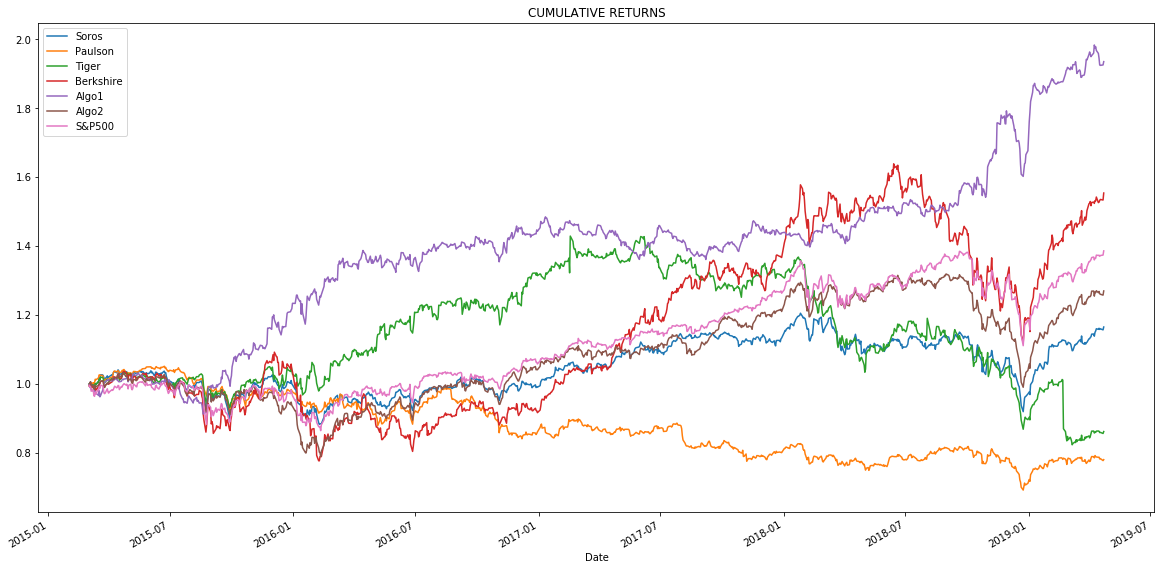

In [26]:
# Plot cumulative returns

cum_returns.plot(figsize=(20, 10), title = 'CUMULATIVE RETURNS').legend(["Soros","Paulson","Tiger", "Berkshire", "Algo1", "Algo2", "S&P500"], loc=0)

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

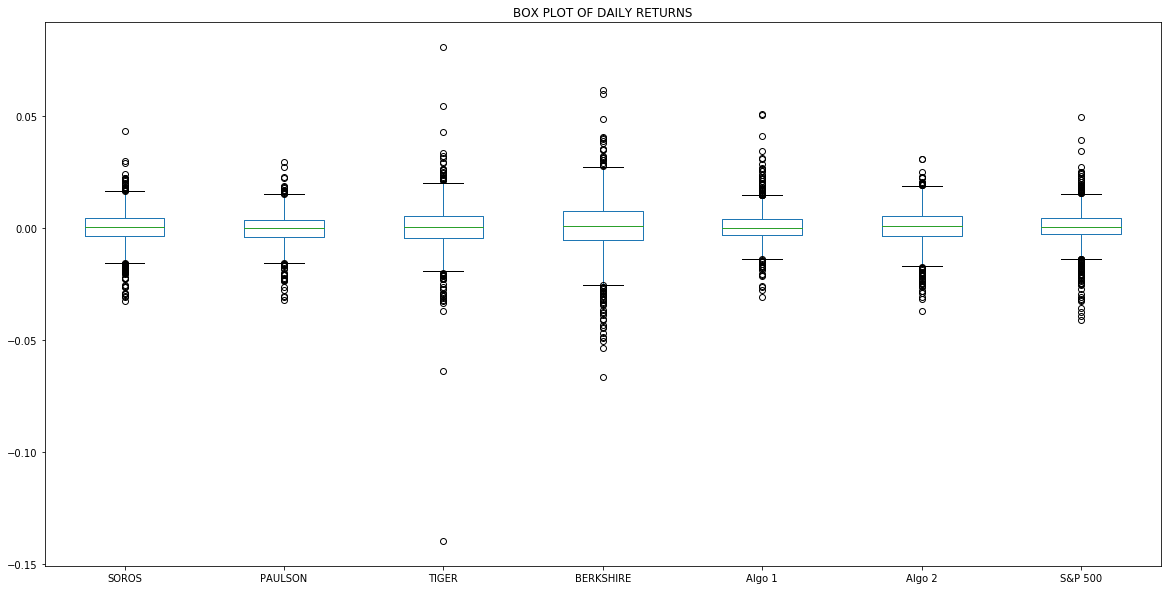

In [27]:
# Box plot of daily returns

combined_df.plot(kind = 'box', figsize=(20, 10), title = 'BOX PLOT OF DAILY RETURNS')

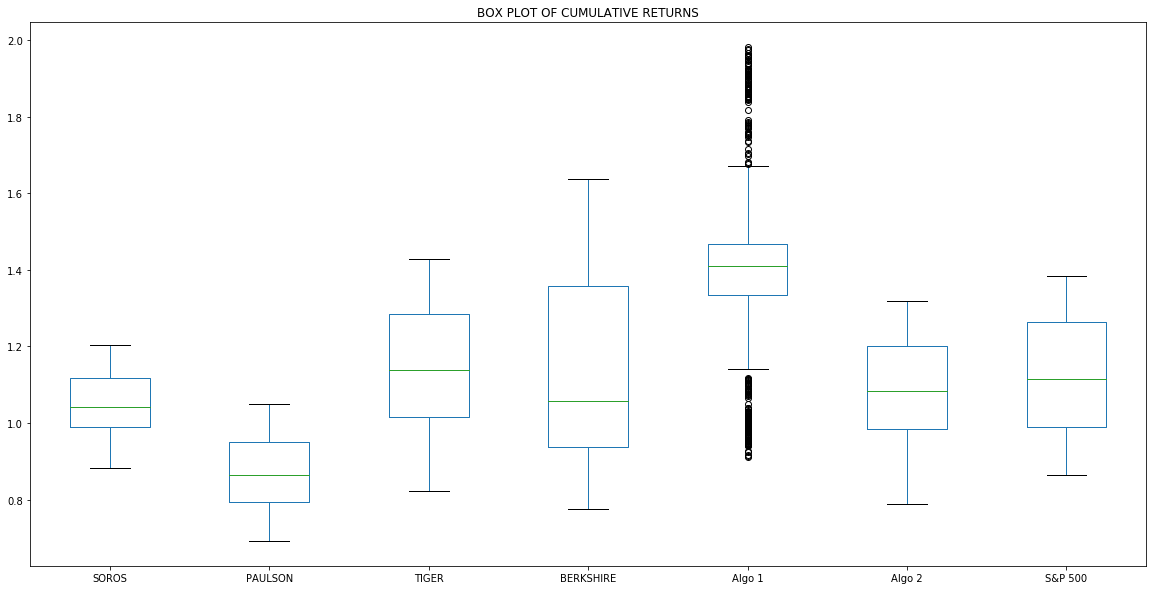

In [28]:
# Box Plot of Cumulative Returns

cum_returns.plot(kind = 'box', figsize=(20, 10), title = 'BOX PLOT OF CUMULATIVE RETURNS')

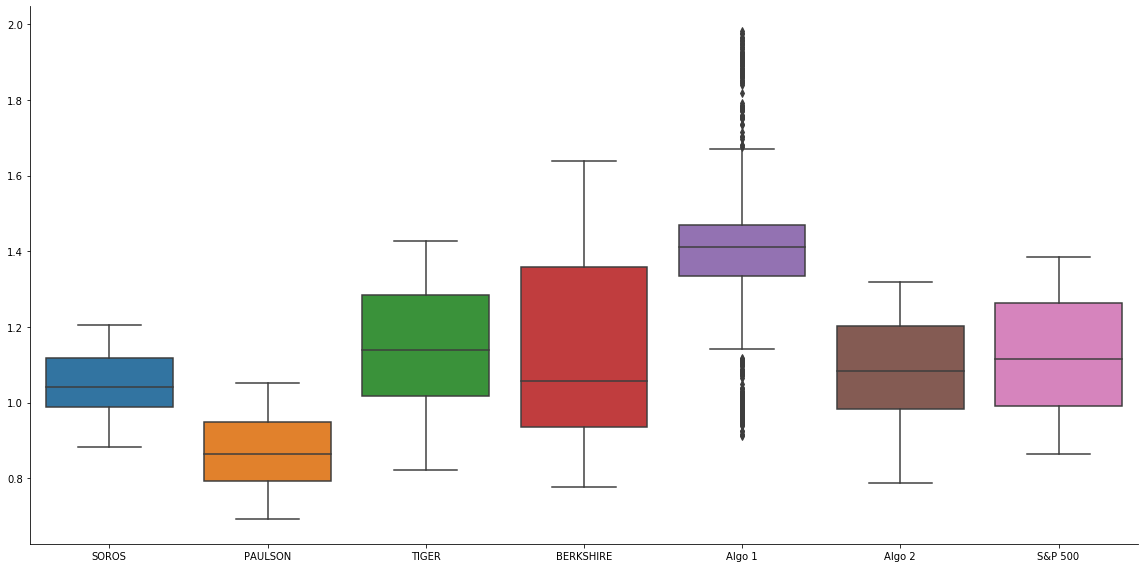

In [29]:
# Box Plot of cumulative returns using Seaborn

sns.catplot(data = cum_returns, kind = 'box', height = 8, aspect = 2)

In [30]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?

Daily_deviation = combined_df.std()
Daily_deviation.sort_values(ascending=False)

BERKSHIRE    0.012919
TIGER        0.010894
S&P 500      0.008554
Algo 2       0.008342
SOROS        0.007895
Algo 1       0.007620
PAULSON      0.007023
dtype: float64

In [32]:
# Calculate the annualized standard deviation (252 trading days)

Annualized_deviation = combined_df.std() * np.sqrt(252)

Annualized_deviation.sort_values(ascending=False)                                         

BERKSHIRE    0.205077
TIGER        0.172936
S&P 500      0.135786
Algo 2       0.132430
SOROS        0.125335
Algo 1       0.120967
PAULSON      0.111488
dtype: float64

In [33]:
# Berkshire Hathaway Inc, Tiger Global Management LLC have higher annualized standard deviation than S&P 500. Hence riskier

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&P 500

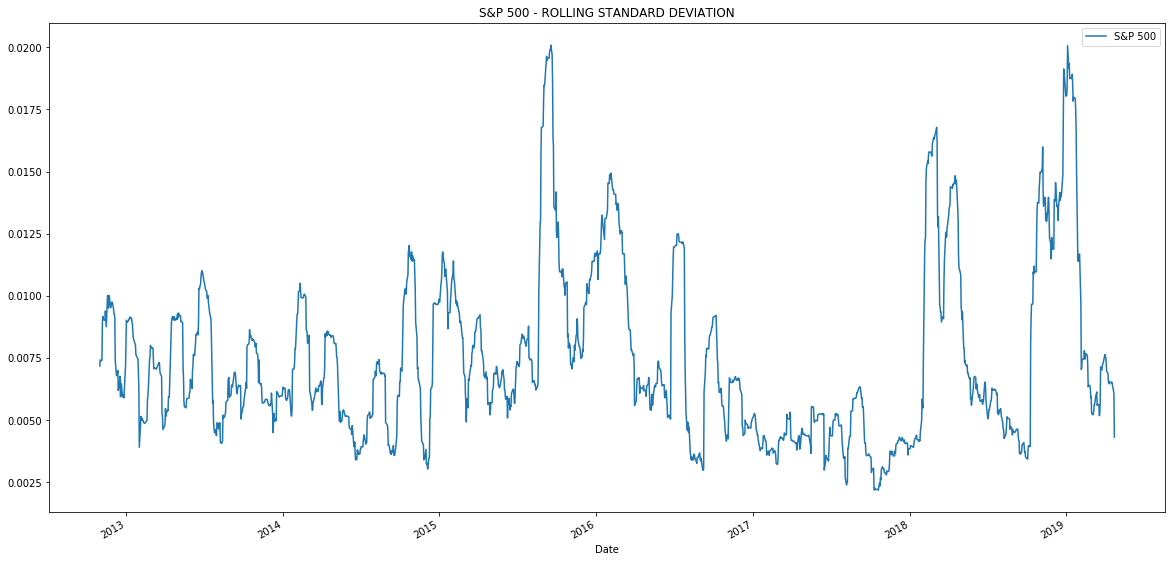

In [34]:
# Calculate and plot the rolling standard deviation for the S&P 500 using a 21 day window

sp500_returns_df.rolling(window=21).std().plot(figsize=(20, 10), title = 'S&P 500 - ROLLING STANDARD DEVIATION')

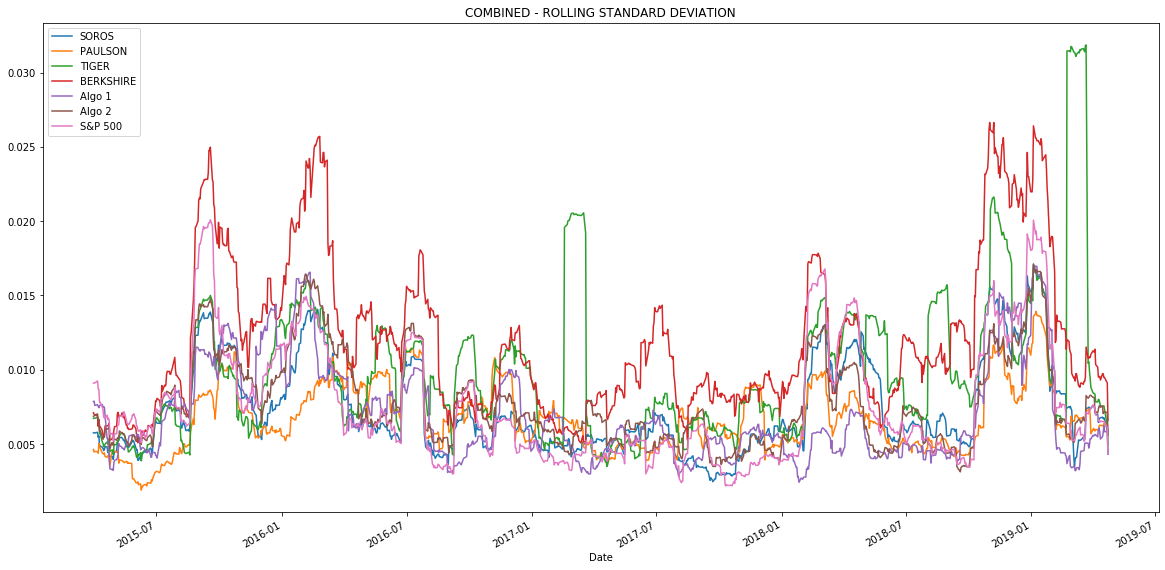

In [35]:
combined_df.rolling(window=21).std().plot(figsize=(20, 10), title = 'COMBINED - ROLLING STANDARD DEVIATION')

In [36]:
# Correlation 

correlation = combined_df.corr()
correlation

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P 500
SOROS,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


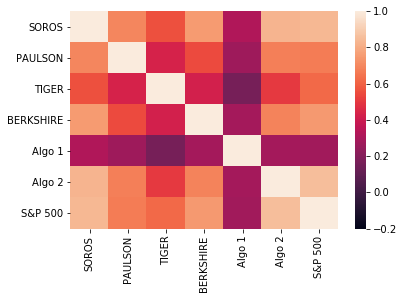

In [37]:
# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation, vmin=-.2, vmax=1)

### Algo 2 (correlation 0.86) and Soros Fund (correlation @ 0.83) are highly correlated with S&P 500 Index

In [38]:
## CALCULATE COVARIANCES & BETAs

In [39]:
# Calculate variance for S&P 500

variance = sp500_returns_df.var()
print(f"S&P 500 variance: {variance}")

S&P 500 variance: S&P 500    0.000066
dtype: float64


In [40]:
# Calculate covariance & BETA

cov_SOROS = combined_df['SOROS'].cov(combined_df['S&P 500'])
beta_SOROS = cov_SOROS / variance

print(f"SOROS Covariance: {cov_SOROS}")
print(f"SOROS Beta: {beta_SOROS}")

SOROS Covariance: 5.658503197203636e-05
SOROS Beta: S&P 500    0.86005
dtype: float64


In [41]:
# Calculate covariance & BETA

cov_TIGER = combined_df['TIGER'].cov(combined_df['S&P 500'])
beta_TIGER = cov_TIGER / variance

print(f"TIGER Covariance: {cov_TIGER}")
print(f"TIGER Beta: {beta_TIGER}")

TIGER Covariance: 5.8141830323050995e-05
TIGER Beta: S&P 500    0.883712
dtype: float64


In [42]:
# Calculate covariance & BETA

cov_BRKS = combined_df['BERKSHIRE'].cov(combined_df['S&P 500'])
beta_BRKS = cov_BRKS / variance

print(f"BRKS Covariance: {cov_BRKS}")
print(f"BRKS Beta: {beta_BRKS}")

BRKS Covariance: 8.302834941861689e-05
BRKS Beta: S&P 500    1.261969
dtype: float64


In [43]:
# Calculate covariance & BETAs

cov_Algo1 = combined_df['Algo 1'].cov(combined_df['S&P 500'])
beta_Algo1 = cov_Algo1 / variance

print(f"Algo 1 Covariance: {cov_Algo1}")
print(f"Algo 1 Beta: {beta_Algo1}")

Algo 1 Covariance: 1.8217749991632822e-05
Algo 1 Beta: S&P 500    0.276896
dtype: float64


In [44]:
# Calculate covariance & BETA

cov_Algo2 = combined_df['Algo 2'].cov(combined_df['S&P 500'])
beta_Algo2 = cov_Algo2 / variance

print(f"Algo 2 Covariance: {cov_Algo2}")
print(f"Algo 2 Beta: {beta_Algo2}")

Algo 2 Covariance: 6.127932374145016e-05
Algo 2 Beta: S&P 500    0.9314
dtype: float64


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

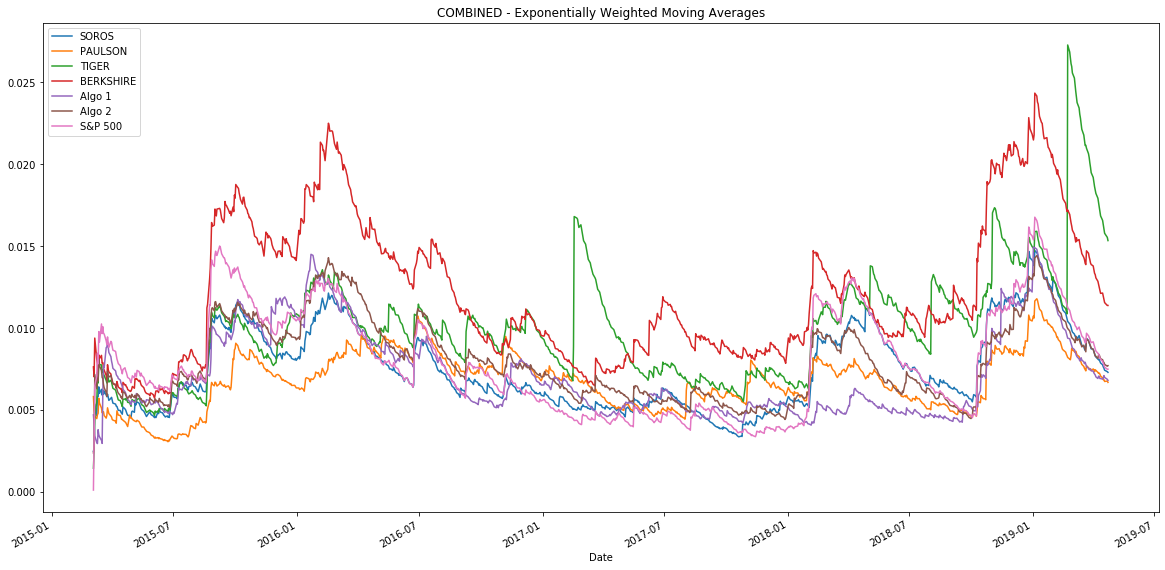

In [45]:
# Exponentially Weighted Moving Averages(21 day half-life)

combined_df.ewm(halflife=21).std().plot(figsize=(20, 10), title = 'COMBINED - Exponentially Weighted Moving Averages')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [46]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False) 

Algo 1       1.378648
S&P 500      0.648267
BERKSHIRE    0.621810
Algo 2       0.501364
SOROS        0.356417
TIGER       -0.121060
PAULSON     -0.483570
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

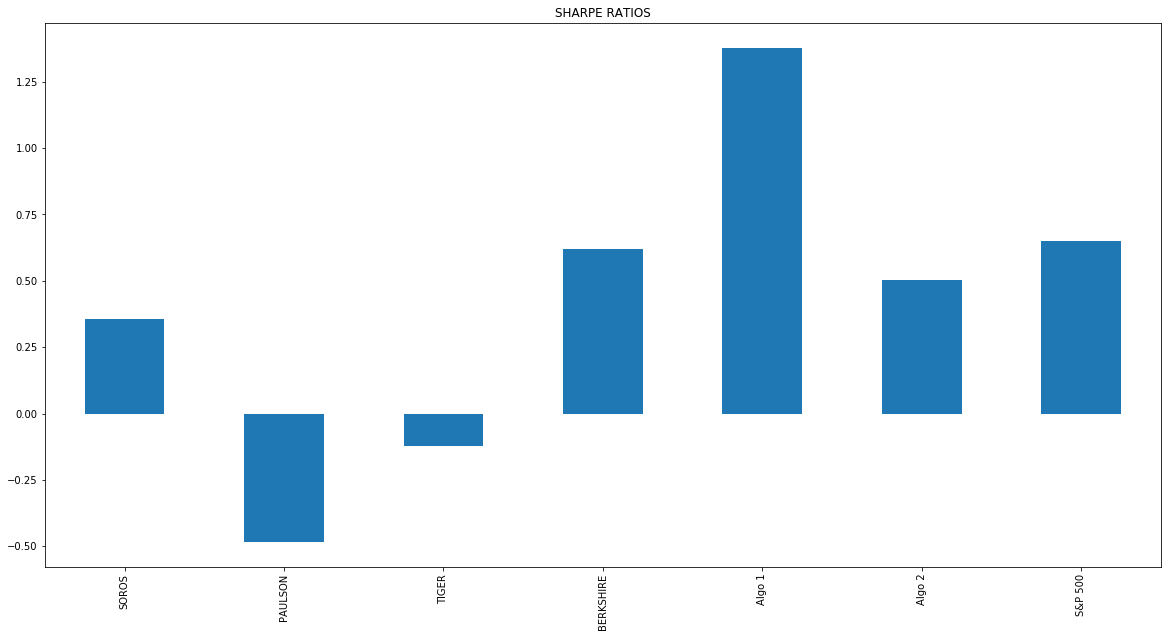

In [47]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot.bar(figsize=(20,10), title = 'SHARPE RATIOS')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [48]:
# Read the first stock
tsla_data = Path("Resources/tsla.csv")

# Define dataframe and display few values

tsla_df = pd.read_csv(tsla_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
tsla_df.sort_index(inplace = True)
tsla_df.drop(columns='Change', inplace = True)
tsla_df.head()

,Close
Date,
2015-03-02,197.33
2015-03-03,199.56
2015-03-04,202.44
2015-03-05,200.63
2015-03-06,193.88


In [49]:
tdoc_data = Path("Resources/tdoc.csv")

# Define dataframe and display few values

tdoc_df = pd.read_csv(tdoc_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
tdoc_df.sort_index(inplace = True)
tdoc_df.drop(columns='Change', inplace = True)
tdoc_df.head()

,Close
Date,
2015-07-01,28.50
2015-07-02,28.00
2015-07-06,26.69
2015-07-07,27.01
2015-07-08,26.25


In [50]:
# Read the third stock
amt_data = Path("Resources/amt.csv")

# Define dataframe and display few values

amt_df = pd.read_csv(amt_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
amt_df.sort_index(inplace = True)
amt_df.drop(columns='Change', inplace = True)
amt_df.head()

,Close
Date,
2015-03-02,99.40
2015-03-03,98.28
2015-03-04,98.56
2015-03-05,99.24
2015-03-06,96.61


In [51]:
# Concatenate all stocks into a single DataFrame

pani_stocks_df = pd.concat([tsla_df, tdoc_df, amt_df], axis="columns", join="inner")
pani_stocks_df.head()

,Close,Close,Close
Date,,,
2015-07-01,269.15,28.50,94.01
2015-07-02,280.02,28.00,94.91
2015-07-06,279.72,26.69,94.98
2015-07-07,267.88,27.01,95.63
2015-07-08,254.96,26.25,94.48


In [52]:
# Calculate daily returns for PANI stocks

pani_returns = pani_stocks_df.pct_change()
pani_returns

,Close,Close,Close
Date,,,
2015-07-01,NaN,NaN,NaN
2015-07-02,0.040386,-0.017544,0.009573
2015-07-06,-0.001071,-0.046786,0.000738
2015-07-07,-0.042328,0.011990,0.006844
2015-07-08,-0.048231,-0.028138,-0.012026
...,...,...,...
2019-05-23,0.014321,-0.049818,0.011212
2019-05-24,-0.024861,0.021873,0.000394
2019-05-28,-0.010124,0.000000,-0.002217


In [53]:
# Drop Null values

pani_returns.dropna(inplace=True)
pani_returns

,Close,Close,Close
Date,,,
2015-07-02,0.040386,-0.017544,0.009573
2015-07-06,-0.001071,-0.046786,0.000738
2015-07-07,-0.042328,0.011990,0.006844
2015-07-08,-0.048231,-0.028138,-0.012026
2015-07-09,0.011610,0.015619,-0.000953
...,...,...,...
2019-05-23,0.014321,-0.049818,0.011212
2019-05-24,-0.024861,0.021873,0.000394
2019-05-28,-0.010124,0.000000,-0.002217


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [54]:
# Calculate weighted portfolio returns

weights = [1/3, 1/3, 1/3]
pani_wtreturns = pani_returns.dot(weights)
pani_wtreturns.head()

Date
2015-07-02    0.010805
2015-07-06   -0.015707
2015-07-07   -0.007832
2015-07-08   -0.029465
2015-07-09    0.008759
dtype: float64

In [55]:
# My cumulative returns

pani_cumreturns = (1 + pani_wtreturns).cumprod()
pani_cumreturns.head

<bound method NDFrame.head of Date
2015-07-02    1.010805
2015-07-06    0.994929
2015-07-07    0.987137
2015-07-08    0.958052
2015-07-09    0.966443
                ...   
2019-05-23    1.842405
2019-05-24    1.840812
2019-05-28    1.833240
2019-05-29    1.801160
2019-05-30    1.807221
Length: 983, dtype: float64>

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [56]:
# combining "pani_returns" with "combined_df"

all_returns = pd.concat([combined_df, pani_wtreturns], axis="columns", join="inner")
all_returns.columns = ["SOROS", "PAULSON", "TIGER", "BERKSHIRE", "ALGO1", "ALGO2", "S&P 500", "PANI"]
all_returns

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO1,ALGO2,S&P 500,PANI
Date,,,,,,,,
2015-07-02,0.000613,-0.000139,-0.001781,-0.009721,-0.002005,-0.005172,-0.000308,0.010805
2015-07-06,-0.005870,-0.002186,-0.001083,-0.005799,-0.014638,-0.004958,-0.003862,-0.015707
2015-07-07,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.006081,-0.007832
2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.016653,-0.029465
2015-07-09,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,0.002262,0.008759
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.007009
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.021447
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.017161


In [57]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

all_returns.dropna()

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO1,ALGO2,S&P 500,PANI
Date,,,,,,,,
2015-07-02,0.000613,-0.000139,-0.001781,-0.009721,-0.002005,-0.005172,-0.000308,0.010805
2015-07-06,-0.005870,-0.002186,-0.001083,-0.005799,-0.014638,-0.004958,-0.003862,-0.015707
2015-07-07,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.006081,-0.007832
2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.016653,-0.029465
2015-07-09,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,0.002262,0.008759
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.007009
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.021447
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.017161


In [58]:
# Combining pani_cumreturns with cum_returns

all_cumreturns = pd.concat([cum_returns, pani_cumreturns], axis="columns", join="inner")
all_cumreturns.columns = ["SOROS", "PAULSON", "TIGER", "BERKSHIRE", "ALGO1", "ALGO2", "S&P 500", "PANI"]
all_cumreturns

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO1,ALGO2,S&P 500,PANI
Date,,,,,,,,
2015-07-02,1.007074,1.038782,0.998889,0.983822,1.001790,0.997021,0.980821,1.010805
2015-07-06,1.001163,1.036511,0.997808,0.978117,0.987126,0.992078,0.977033,0.994929
2015-07-07,1.001761,1.040617,1.002450,0.970650,0.982574,0.989579,0.982974,0.987137
2015-07-08,0.984519,1.032652,0.987626,0.959258,0.968962,0.974212,0.966605,0.958052
2015-07-09,0.991875,1.036666,0.988061,0.976208,0.982615,0.977742,0.968792,0.966443
...,...,...,...,...,...,...,...,...
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,1.372945,1.925118
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,1.369823,1.883831
2019-04-18,1.159278,0.782678,0.858778,1.534716,1.923823,1.259590,1.371986,1.916160


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

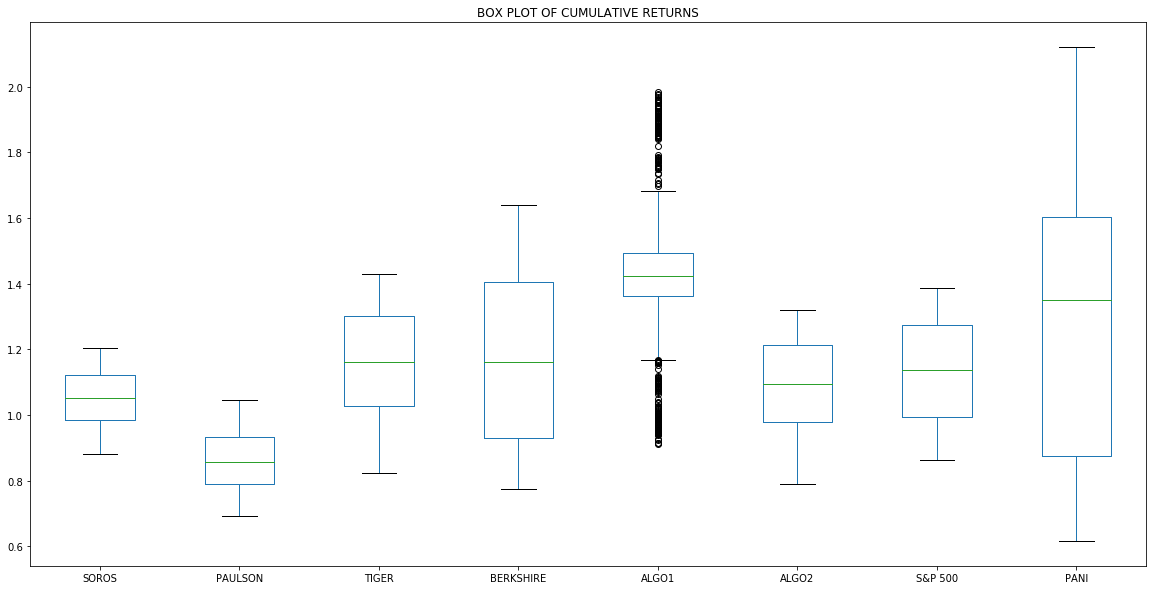

In [59]:
# Risk
# Box Plot of cumulative returns 

all_cumreturns.plot(kind = 'box', figsize=(20, 10), title = 'BOX PLOT OF CUMULATIVE RETURNS')

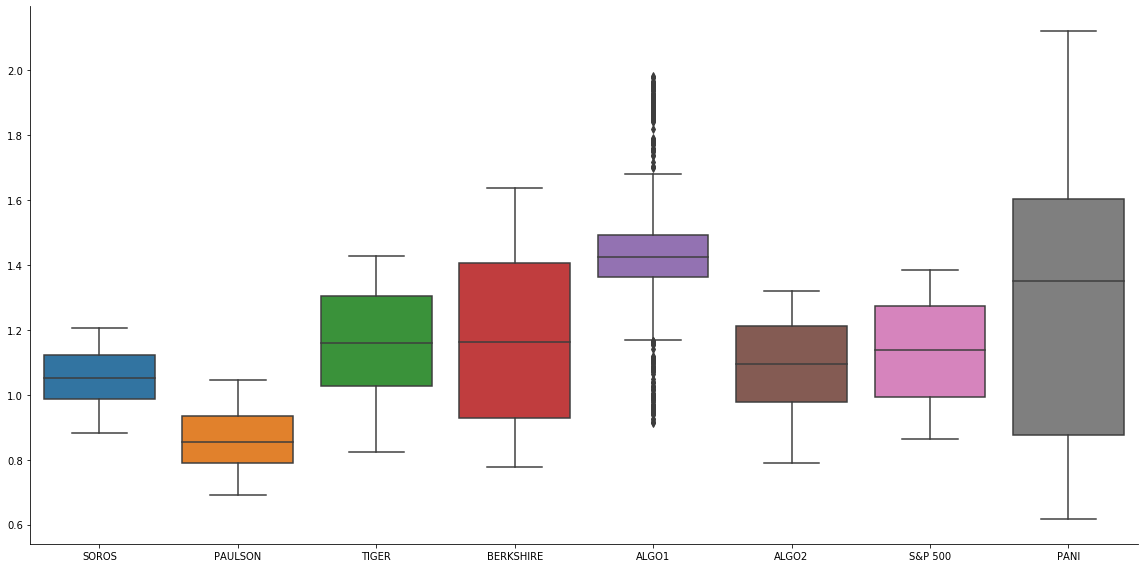

In [60]:
# Box Plot of cumulative returns using Seaborn

sns.catplot(data = all_cumreturns, kind = 'box', height = 8, aspect = 2)

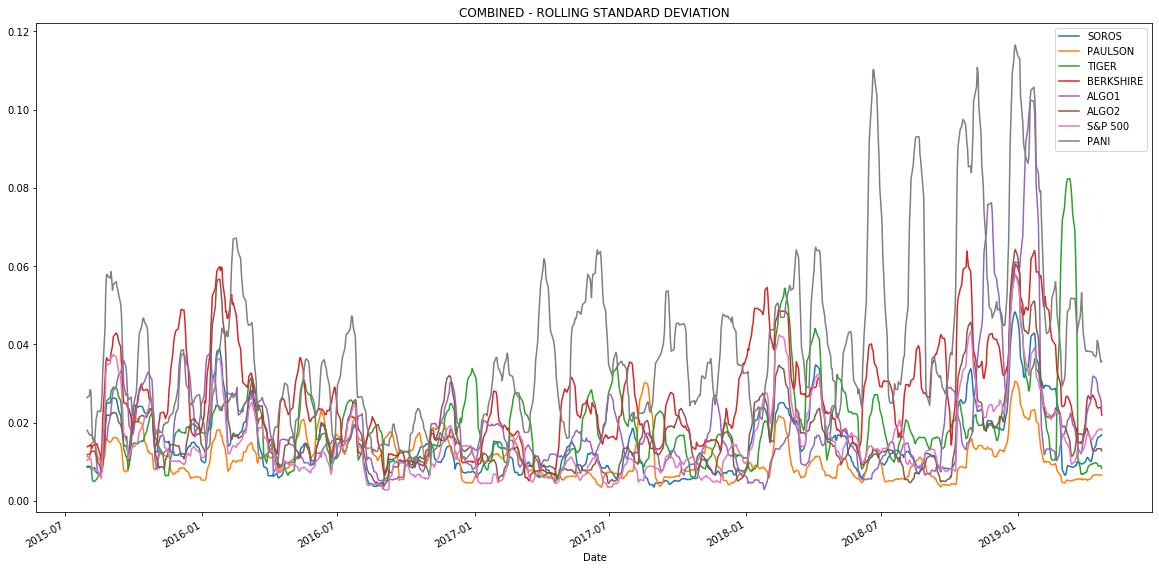

In [61]:
# Rolling

all_cumreturns.rolling(window=21).std().plot(figsize=(20, 10), title = 'COMBINED - ROLLING STANDARD DEVIATION')

In [62]:
# Beta
cov_Pani = all_cumreturns['PANI'].cov(combined_df['S&P 500'])
beta_Pani = cov_Algo1 / variance

print(f"PANI Covariance: {cov_Algo1}")
print(f"PANI Beta: {beta_Algo1}")

PANI Covariance: 1.8217749991632822e-05
PANI Beta: S&P 500    0.276896
dtype: float64


In [63]:
# Annualzied Sharpe Ratios

sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False) 


ALGO1        1.493441
PANI         0.752111
S&P 500      0.731333
BERKSHIRE    0.641011
ALGO2        0.533238
SOROS        0.363820
TIGER       -0.122697
PAULSON     -0.605142
dtype: float64

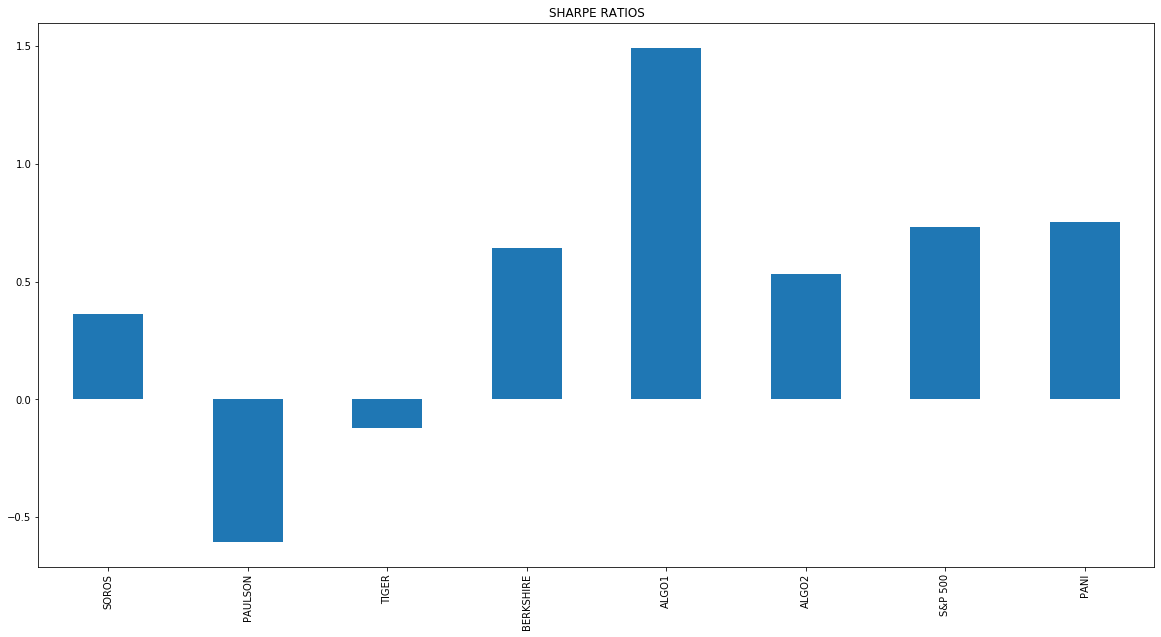

In [64]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot.bar(figsize=(20,10), title = 'SHARPE RATIOS')

## Include correlation analysis to determine which stocks (if any) are correlated

In [65]:
# YOUR CODE HERE

# Correlation 

correlation = all_returns.corr()
correlation

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO1,ALGO2,S&P 500,PANI
SOROS,1.000000,0.699916,0.554295,0.754205,0.328138,0.827291,0.839271,0.522023
PAULSON,0.699916,1.000000,0.428341,0.543280,0.278949,0.679414,0.672711,0.381246
TIGER,0.554295,0.428341,1.000000,0.418006,0.165698,0.497214,0.615740,0.314675
BERKSHIRE,0.754205,0.543280,0.418006,1.000000,0.301531,0.687375,0.755702,0.542840
ALGO1,0.328138,0.278949,0.165698,0.301531,1.000000,0.299961,0.287042,0.201871
ALGO2,0.827291,0.679414,0.497214,0.687375,0.299961,1.000000,0.858530,0.514436
S&P 500,0.839271,0.672711,0.615740,0.755702,0.287042,0.858530,1.000000,0.550102
PANI,0.522023,0.381246,0.314675,0.542840,0.201871,0.514436,0.550102,1.000000


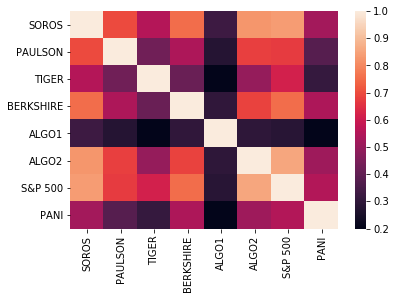

In [66]:
# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation, vmin=0.2, vmax=1)